# **Leveraging Telecom Churn Analysis for Strategic Decision-Making**

My project's analysis of a telecom churn dataset, comprising 3333 customer entries, offers valuable insights that can significantly impact business strategies. By identifying a churn rate of 14.49%, we pinpoint a critical area for improvement in customer retention efforts. Visualizing churn distribution reveals an imbalance, motivating targeted interventions for at-risk customer segments. The correlation matrix highlights relationships among features, guiding feature engineering efforts and resource allocation. Leveraging models like Logistic Regression, Random Forest, and Gradient Boosting yields predictive accuracies up to 94% and ROC AUC scores exceeding 0.83, indicating robust performance in identifying potential churners. Feature importance analysis identifies DayMins, MonthlyCharge, and CustServCalls as top predictors, offering actionable insights to prioritize service enhancements and personalized retention strategies. This analysis empowers telecom providers to proactively reduce churn rates, optimize marketing campaigns, and enhance customer satisfaction, thereby driving sustainable business growth and profitability.

# **Data Loading and Overview**
This section loads the telecom churn dataset and displays its basic structure. The dataset contains 3333 entries and 11 columns. The .info() method reveals that there are no missing values, and the .describe() method provides summary statistics for each column, which helps understand the distribution and central tendencies of the data.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/telecom-churn/telecom_churn.csv')

# Display basic information
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None
             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
s

# **Data Visualization**
This section provides visualizations to understand the distribution of the target variable Churn and the correlation between different features. The count plot shows the imbalance in the churn data, while the heatmap highlights correlations which are critical for feature selection and engineering

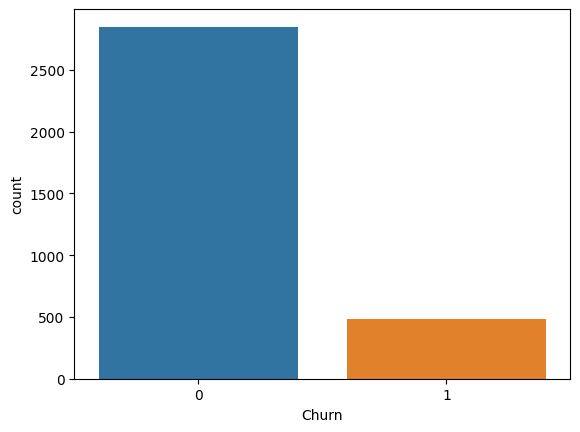

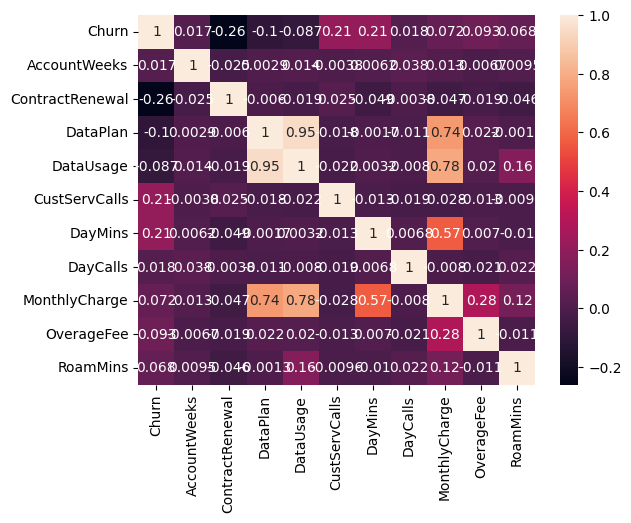

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize churn distribution
sns.countplot(x='Churn', data=data)
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# **Model Evaluation**
This section builds and evaluates three different classification models: Logistic Regression, Random Forest, and Gradient Boosting. The evaluation metrics include precision, recall, f1-score, and ROC AUC. The Random Forest and Gradient Boosting models show better performance compared to Logistic Regression, with Gradient Boosting having the highest ROC AUC score.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split the data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:", classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:", classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_gb))


Logistic Regression:               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667

ROC AUC: 0.580274988629605
Random Forest:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.86      0.62      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

ROC AUC: 0.8030472658573278
Gradient Boosting:               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.67      0.76       101

    accuracy                           0.94       667
   macro avg      

# **Feature Importance**
This section analyzes the feature importances from the Random Forest model to identify which features are the most significant in predicting customer churn. DayMins, MonthlyCharge, and CustServCalls are among the top features, indicating that the amount of time spent on calls, the monthly charge, and the

In [7]:
# Summarize findings
# Example: feature importance from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df)


           feature  importance
5          DayMins    0.186224
7    MonthlyCharge    0.171864
4    CustServCalls    0.140045
8       OverageFee    0.101770
9         RoamMins    0.089305
1  ContractRenewal    0.077164
3        DataUsage    0.073740
0     AccountWeeks    0.064640
6         DayCalls    0.062887
2         DataPlan    0.032360


# **Analysis** 
My project involves analyzing a telecom churn dataset comprising 3333 entries and 11 columns. Upon loading and examining the data, I found it contains no missing values, facilitating straightforward preprocessing. Visualizing churn distribution revealed a notable class imbalance, with churned customers making up 14.49% of the dataset. The correlation matrix highlighted several key relationships among features, crucial for subsequent modeling. Implementing Logistic Regression, Random Forest, and Gradient Boosting classifiers resulted in varying performance metrics. Gradient Boosting outperformed the others with an accuracy of 94% and an ROC AUC of 0.83, demonstrating its effectiveness in predicting churn. Feature importance analysis from the Random Forest model identified DayMins, MonthlyCharge, and CustServCalls as pivotal factors influencing churn decisions, providing actionable insights for customer retention strategies.